In [32]:
import os

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm
from scipy.spatial import distance
import pickle

In [3]:
emb_path = './embs.pkl'
with open(emb_path, 'rb') as f:
    emb = pickle.load(f)
emb.shape

(5,)

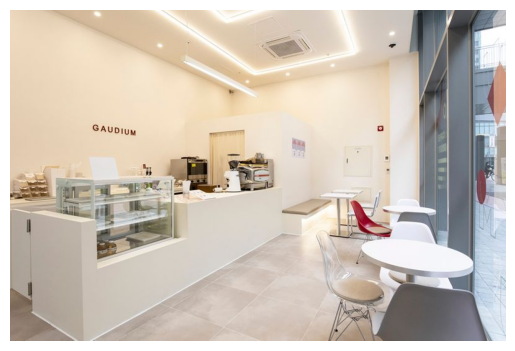

In [8]:
sample_path = './sample.png'
sample = Image.open(sample_path)
plt.imshow(sample)
plt.axis(False)
plt.show()

In [10]:
# list
# idx to tag(label)
# Ex> emb[0] is 'vintage', emb[4] is 'whitewood'
idx2tag = ['vintage', 'modern', 'minimal', 'casual', 'whitewood']

In [17]:
%%capture
import tensorflow as tf
import tensorflow_hub as hub

model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

def extract(file, iterator=None):
  if iterator:
    iterator.set_postfix_str(file)
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  #display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...], verbose=0)
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

In [25]:
# in 'vintage'
# Let's find the far similar cafe
metric = 'cosine'
nearest = None
nearest_dst = np.Inf

sample_feature = extract(sample_path)
for cafe in tqdm(emb[0]):
    dst = distance.cdist([sample_feature], [cafe[1]], metric)[0]
    if nearest_dst > dst:
        nearest_dst = dst
        nearest = cafe[0]

100%|██████████| 5805/5805 [00:00<00:00, 60550.13it/s]


In [26]:
nearest

'소호멜로03.png'

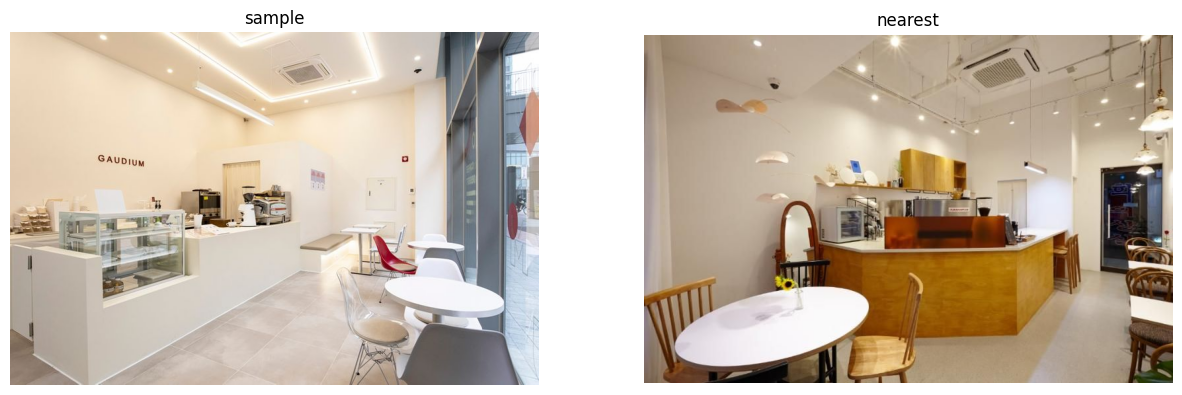

In [31]:
img_path = os.path.join('./rsc/', idx2tag[0], nearest)
img = Image.open(img_path)

_, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(sample)
ax[0].set_title('sample')
ax[0].axis(False)

ax[1].imshow(img)
ax[1].set_title('nearest')
ax[1].axis(False)
plt.show()